In [24]:
from mnist import MNIST
import random 
import math

mndata = MNIST('samples')

images, labels = mndata.load_training()
# 1or
# images, labels = mndata.load_testing()

In [25]:
# index = 999  # choose an index ;-)
# # print(mndata.display(images[index]))
# print(labels[index])
# print(len(images[index]))

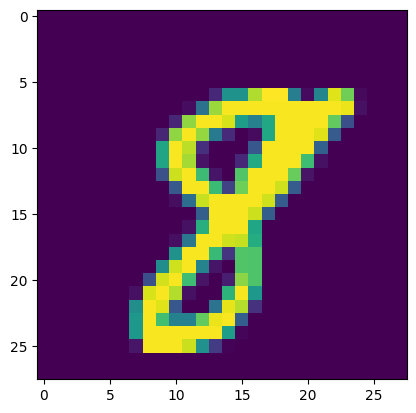

In [26]:
import matplotlib.pyplot as plt
import numpy as np
index = 55
image = np.array(images[index]).reshape(28, 28)
plt.imshow(image)
plt.show()

In [27]:
class neuron:
    def __init__(self, activation, layer, row, weights, bias):
        self.activation = activation
        self.layer = layer
        self.row = row
        self.weights = weights
        self.bias = bias 


In [28]:
class input_neuron(neuron):
    def __init__(self, activation, row):
        super().__init__(activation, 0, row, [], 0)

In [29]:
class output_neuron(neuron):
    def __init__(self, activation, row, weights, bias):
        super().__init__(0, 3, row, weights, bias)

In [30]:
class hidden_neuron(neuron):
    def __init__(self, activation, layer, row, weights, bias):
        super().__init__(activation, layer, row, weights, bias)

In [31]:
net = [[],[],[],[]]
for i in range(len(images[0])):
    net[0].append(input_neuron(0, i))
for i in range(1, 3):
    for j in range(16):
        net[i].append(hidden_neuron(0, i, j, [random.randint(0, 100)/100 for i in range(len(net[i-1]))], random.randint(1, 100)))
for i in range(10):
    net[3].append(output_neuron(0, i, [random.randint(0, 100)/100 for i in range(len(net[2]))], random.randint(1, 100)))


In [32]:
image_number = 0
for i in range(len(net[0])):
    net[0][i].activation = images[image_number][i]
    

In [35]:
def run_net(input, net):
    #loads image
    for i in range(len(net[0])):
        net[0][i].activation=input[i]
    # activates first hidden layer
    activate_layer(net, 1)
    print("################################")
    activate_layer(net, 2)
    print("###################################")
    activate_layer(net, 3)

def activate_layer(net, layer):
    for i in range(len(net[layer])):
        for j in range(len(net[layer-1])):
            net[layer][i].activation += (net[layer-1][j].activation * net[layer][i].weights[j])
        net[layer][i].activation += net[layer][i].bias
        net[layer][i].activation = 1/(1+math.exp(net[layer][i].activation * -1))
        print(net[layer][i].activation)


    

run_net(images[0], net)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
################################
1.0
1.0
0.9999999725252938
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999938833
0.9999999654203348
1.0
###################################
1.0
0.9999989107280981
1.0
1.0
1.0
0.9999997844343188
1.0
1.0
0.9999999999999987
1.0
